## [Gui Features in OpenCV](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_table_of_contents_gui/py_table_of_contents_gui.html#py-table-of-content-gui)

In [ ]:
import cv2

# 图片读取
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html#py-display-image
# img=cv2.imread('cat.jpg',1)#0 gray ,1 color
# cv2.imshow('cat',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [2]:
import cv2

#图片写入
img=cv2.imread('cat.jpg',1)
cv2.imwrite('cat_write.jpg',img)

False

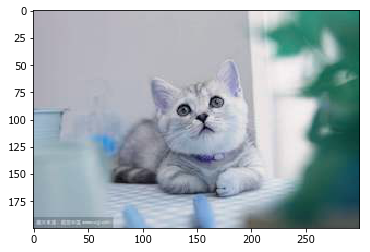

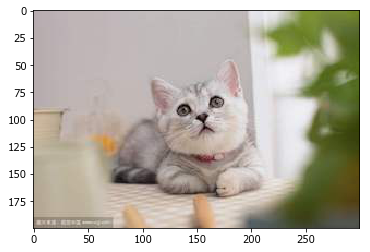

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


img=cv2.imread('images/cat.jpg')

plt.subplots()
plt.imshow(img)
plt.show()
#cv2图片是bgr，而非rgb 
#正常显示
def show_rgb(img):
#     tmp=np.apply_along_axis(lambda x:x[::-1],2,img)
    tmp=img[:,:,::-1]

    plt.subplots()
    plt.imshow(tmp)
    plt.show()
    
show_rgb(img)

In [22]:
#获取像素值
(b,g,r)=img[100,100]
b,g,r

(142, 144, 155)

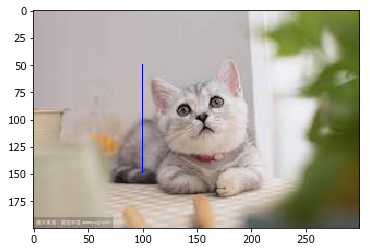

In [23]:
#修改像素
tmp=img.copy()
for i in range(100):
    tmp[50+i,100]=(255,0,0)
show_cv_img(tmp)

In [24]:
img_info=img.shape
img_info

(200, 300, 3)

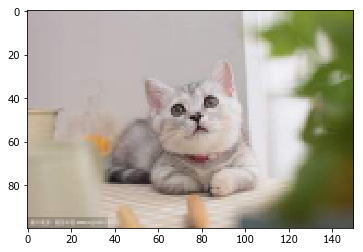

In [25]:
tmp=cv2.resize(img,(150,100))
show_cv_img(tmp)

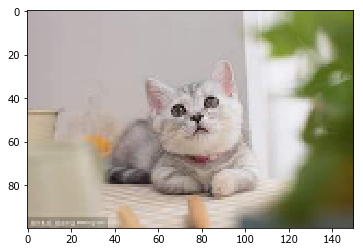

In [26]:
#最近临域插值法
import numpy as np

height=int(img.shape[0]/2)
width=int(img.shape[1]/2)
tmp=np.zeros((height,width,3),np.uint8)
for i in range(height):
    for j in range(width):
        _i=int(i*(img.shape[0]*1.0/height))
        _j=int(j*(img.shape[1]*1.0/width))
        tmp[i,j]=img[_i,_j]

show_cv_img(tmp)

#双线性插值

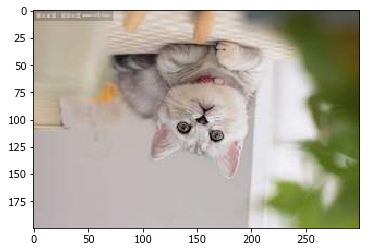

In [27]:
#镜像
tmp=np.apply_along_axis(lambda x:x[::-1],0,img)
show_cv_img(tmp)

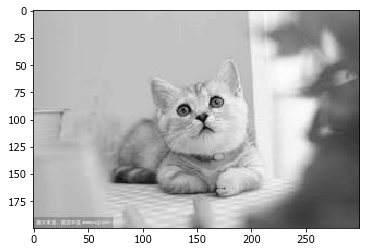

In [28]:
#灰度
def show_gray(img):
    plt.subplot()
    plt.imshow(img)
    plt.gray()
    plt.show()

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show_gray(gray)

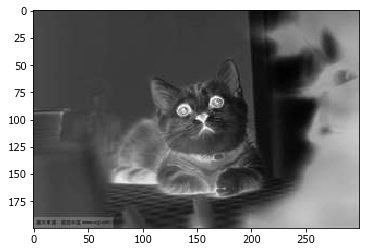

In [29]:
#反转
tmp=np.apply_along_axis(lambda x:255-x,1,gray)
show_gray(tmp)

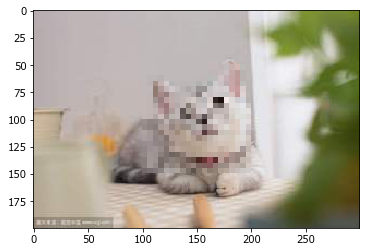

In [30]:
#马赛克：范围内像素用同一个像素值代替
tmp=img.copy()
radius=5
for i in range(50,150):
    for j in range(100,200):
        if i%radius==0 and j%radius==0:
            for n in range(radius):
                for m in range(radius):
                    tmp[i+n,j+m]=img[i,j]

show_cv_img(tmp)

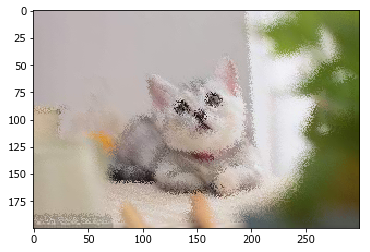

In [31]:
#毛玻璃效果：像素随机交换
import random
tmp=img.copy()
radius=5
for i in range(img.shape[0]-radius):
    for j in range(img.shape[1]-radius):
        index=int(random.random()*radius)
        tmp[i,j]=img[i+index,j+index]
        
show_cv_img(tmp)

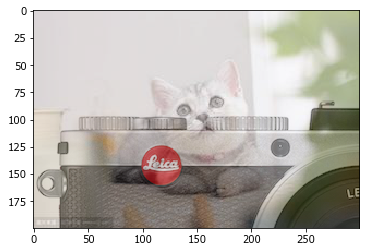

In [32]:
#图片叠加

leica=cv2.imread('leica.jpg',1)
tmp_leica=leica[0:img.shape[0],0:img.shape[1]:]

add_img=cv2.addWeighted(tmp_leica,0.5,img,0.5,0)
show_cv_img(add_img)

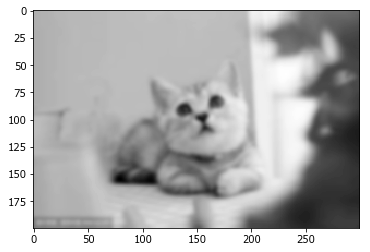

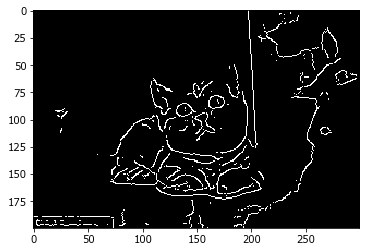

In [33]:
#边缘检测
radius=9 #高斯模糊半径必须是奇数
gaussed=cv2.GaussianBlur(gray,(radius,radius),0)
show_gray(gaussed)
high_contrast=cv2.Canny(gaussed,50,50)
show_gray(high_contrast)

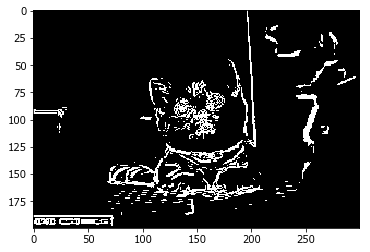

In [34]:
#边缘检测：卷积后二值化
#竖直方向卷积核
f_v=np.array([[1,1,1],
              [0,0,0],
              [-1,-1,-1]])
#水平方向卷积核
f_h=np.array([[1,0,-1],
              [1,0,-1],
              [1,0,-1]])

# import scipy
# from scipy import ndimage
# conv=ndimage.filters.convolve(gray,f_h)
# conv2=ndimage.filters.convolve(conv,f_v)
# two=np.apply_along_axis(lambda x:np.where(x<50,0,255),1,conv2)
# show_gray(two)

import math

high=gray.shape[0]
width=gray.shape[1]
tmp=np.zeros((high,width),np.uint8)
for i in range(high-2):
    for j in range(width-2):
        v=gray[i,j]*1+gray[i,j+1]*2+gray[i,j+2]*1 - gray[i+2,j]-gray[i+2,j+1]*2-gray[i+2,j+2]
        h=gray[i,j]*1+gray[i+1,j]*2+gray[i+2,j]*1 - gray[i,j+2]-gray[i+1,j+2]*2-gray[i+2,j+2]
        tmp[i,j]=math.sqrt(v*v+h*h)
        
two=np.apply_along_axis(lambda x:np.where(x<100,0,255),1,tmp)
show_gray(two)

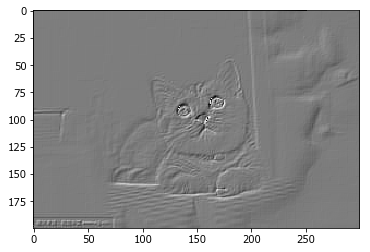

In [35]:
#浮雕效果：相邻像素之差+一个灰度值

padding=1

tmp=np.zeros(gray.shape,np.uint8)
tmp[padding:,padding:]=gray[:-padding,:-padding]

subed=gray-tmp+125
subed_=np.apply_along_axis(lambda x:np.where(x<0,0,x),1,subed)
show_gray(subed_)

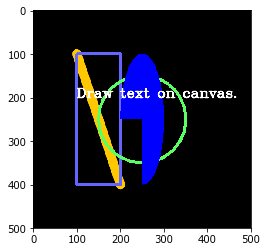

In [57]:
#图形绘制
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html#drawing-functions
shape=(500,500,3)
canvas=np.zeros(shape,np.uint8)

cv2.line(canvas,(100,100),(200,400),(0,200,255),20,cv2.LINE_AA)
#cv2.line（图片，起点，终点，颜色，粗细（-1则是填充），线段类型）

# cv2.imshow('line',canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

cv2.rectangle(canvas,(100,100),(200,400),(255,100,100),5)
cv2.circle(canvas,(250,250),(100),(100,255,90),5)
cv2.ellipse(canvas,(250,250),(150,50),90,90,360,255,-1)#90,90,360 旋转角度／起始角度

#
cv2.putText(canvas,'Draw text on canvas.',(100,200),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2,cv2.LINE_AA)

show_cv_img(canvas)

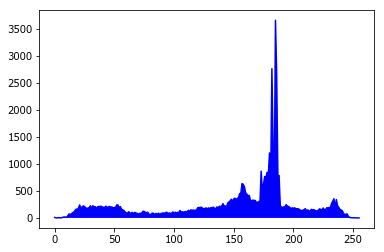

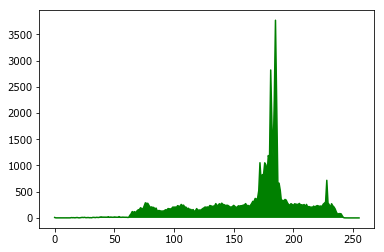

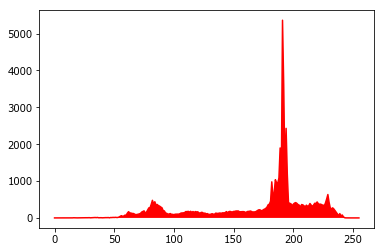

In [104]:
#直方图绘制
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html#table-of-content-histograms

def show_hist(array,i):
    colors=['b','g','r']
    
    plt.subplots()
    index=range(len(array))
    plt.plot(index,array,colors[i])
    plt.fill_between(index,array,where=array<=max(array),facecolor=colors[i])
    plt.show()
    
for i in range(3):
    hist=cv2.calcHist([img],[i],None,[256],[0,256])
    flattened=hist.flatten()
    show_hist(flattened,i)
    

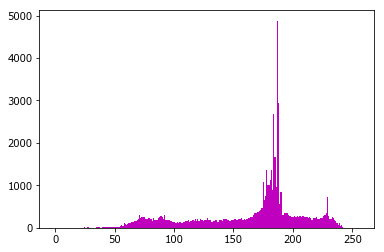

In [103]:
hist=cv2.calcHist([gray],[0],None,[256],[0,256])
flattened=hist.flatten()
plt.bar(np.linspace(0,255,256),flattened,1,color='m')
plt.show()

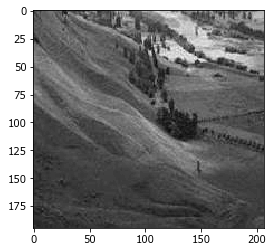

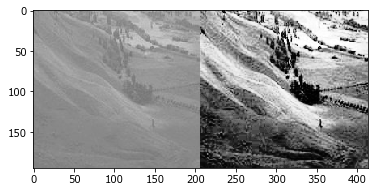

In [89]:
#直方图均衡化
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html#py-histogram-equalization
gray_hist=cv2.imread('gray_hist.jpg',0)
show_gray(gray_hist)#自动处理了？
equ=cv2.equalizeHist(gray_hist)
show_gray(np.hstack((gray_hist,equ)))

In [ ]:
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_trackbar/py_trackbar.html#trackbar

import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()
